# CIFAR10图像识别问题的卷积神经网络实践

按课程案例，动手完成编编码实践。

可尝试采用不同的学习率、单批次样本数、训练轮数等超参数，或是改变模型结构（例如：增加卷积层、池化层或全连接层的数量）让模型的准确率达到70%。


提交要求：

1. 你认为最优的一次带运行结果的源代码文件（.ipynb 格式）
2. 作为附件上传


评分标准：

1. 完成CIFAR10图像识别问题的卷积神经网络的建模与应用（必须采用卷积神经网络），有完整的代码，模型能运行，准确率达60%以上；得6分；每下降一个百分点，少得1分；
2. 准确率达65%以上；再得2分，否则再得0分；
3. 准确率到70%以上；再得2分，否则再得0分；
4. 之所以只提70%的准确率作为满分的标准，不是说只能达到这个识别率，而是考虑同学们设备的算力和时间，有GPU的会很快，如果只是CPU的还是需要一些时间的。

# tensorflow2.0实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(f'tensorflow 的版本为 {tf.__version__}')

tensorflow 的版本为 2.0.0


In [2]:
# 下载、导入数据集
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_images = train_images / 255
test_images = test_images / 255
# 标签值 One-Hot 编码
train_labels_ohe = tf.one_hot(train_labels.flatten(), depth=10).numpy()
test_labels_ohe = tf.one_hot(test_labels.flatten(), depth=10).numpy()

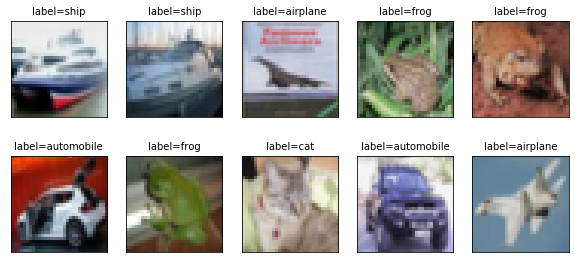

In [3]:
# 定义可视化函数
def plot_images_labels_prediction(images,      # 图像列表
                                  labels,      # 标签列表
                                  prediction,  # 预测值列表
                                  index,       # 从第index个开始显示
                                  num=5):      # 缺省一次显示5幅
    fig = plt.gcf() # 获取当前图表，Get Current Figure
    fig.set_size_inches(10, 12)  # 1英寸等于 2.54 cm
    if num > 10: 
        num = 10            # 最多显示10个子图
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)  # 获取当前要处理的子图
        ax.imshow(images[index],  # 显示第index个图像
                  cmap='binary')
        title = f'label={classes[labels[index][0]]}'  # 构建该图上要显示的title信息
        if len(prediction) > 0:
            title = f'{title},predict={np.argmax(predictions[index])}'
        ax.set_title(title, fontsize=10)   # 显示图上的title信息
        ax.set_xticks([])  # 不显示坐标轴
        ax.set_yticks([])        
        index += 1 
    plt.show()

plot_images_labels_prediction(test_images,
                              test_labels,
                              [], 1, 10)

In [4]:
# 设置训练参数
train_epochs = 15  # 训练轮数
batch_size = 50  # 单次训练样本数（批次大小）
learning_rate = 0.0005

# 建立模型
conv1 = tf.keras.layers.Conv2D(
    filters=32,  # 卷积层神经元（卷积核）数目
    kernel_size=[3, 3],  # 感受野大小
    padding='same',  # padding策略（vaild 或 same）
    activation='relu'   # 激活函数
)
conv2 = tf.keras.layers.Conv2D(32, [3, 3], padding='same', activation='relu')
conv3 = tf.keras.layers.Conv2D(64, [3, 3], padding='same', activation='relu')
pool = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
model = tf.keras.models.Sequential([
    conv1,
    pool,
    conv2,
    pool,
    conv3,
    pool,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# 定义训练模式
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
train_history = model.fit(train_images, train_labels_ohe,
                          batch_size=batch_size,
                          epochs=train_epochs,
                          verbose=2,  # 每epoch一行反馈。默认为1进度条
                          validation_split=0.2)  # 每epoch用作计算loss和metrics的比例

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 9s - loss: 1.6408 - accuracy: 0.4068 - val_loss: 1.3445 - val_accuracy: 0.5165
Epoch 2/15
40000/40000 - 7s - loss: 1.3167 - accuracy: 0.5326 - val_loss: 1.1626 - val_accuracy: 0.5896
Epoch 3/15
40000/40000 - 7s - loss: 1.1619 - accuracy: 0.5868 - val_loss: 1.1129 - val_accuracy: 0.6091
Epoch 4/15
40000/40000 - 7s - loss: 1.0494 - accuracy: 0.6258 - val_loss: 0.9821 - val_accuracy: 0.6497
Epoch 5/15
40000/40000 - 7s - loss: 0.9585 - accuracy: 0.6610 - val_loss: 0.9612 - val_accuracy: 0.6560
Epoch 6/15
40000/40000 - 7s - loss: 0.8795 - accuracy: 0.6903 - val_loss: 0.9032 - val_accuracy: 0.6766
Epoch 7/15
40000/40000 - 7s - loss: 0.7972 - accuracy: 0.7166 - val_loss: 0.8915 - val_accuracy: 0.6862
Epoch 8/15
40000/40000 - 7s - loss: 0.7364 - accuracy: 0.7397 - val_loss: 0.8895 - val_accuracy: 0.6894
Epoch 9/15
40000/40000 - 7s - loss: 0.6605 - accuracy: 0.7648 - val_loss: 0.9192 - val_accuracy: 0.6966
Epoch 10/15
40

In [5]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels_ohe,
                                     verbose=0)  # 无反馈
print('Test accuracy:', test_acc)

Test accuracy: 0.7071
